In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
dataset_train = pd.read_csv(r"Google_Stock_Price_Train.csv")

In [58]:
train_set = dataset_train.iloc[:,1:2] #we will predict only opening values, so we grab 1st column
#remember in rnn, i/p and o/p is same
train_set = train_set.values

In [59]:
#standard scaling to convert values b/w specific range. here we use minmaxscaler(0 to 1)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_set = sc.fit_transform(train_set)

In [60]:
#To split b/w i/p and o/p we can decide no of rows are i/p's to a specific output
#Remember i/p and o/p is same in rnn
#ex: 0-60 rows i/p
#61 row - o/p
#1-61 - i/p
#62 - o/p
#here we decide for every o/p 60 rows of i/p data is req
x_train = []
y_train = []
for i in range(60,dataset_train.shape[0]):
    x_train.append(train_set[i-60:i,0]) #array([0.9,0.3,....]) is appended to list literally
    y_train.append(train_set[i,0])
 
x_train,y_train = np.array(x_train),np.array(y_train)#Now evry 60 elements become columns

In [61]:
x_train.shape

(1198, 60)

In [62]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))#just like cnn, rnn needs 3 dimensions

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [64]:
model = Sequential()
model.add(LSTM(units=60, return_sequences=True,input_shape = (x_train.shape[1],1)))#return seq being true means we will add more LSTM layers afterwards
model.add(Dropout(0.2))#if there are repeated values in training data, it will omit them. 0.2 indicates if > 20% repitions, omit them i think
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60))
model.add(Dropout(0.2))
#I think 3 LSTM layers for three gates as seen in 13_rnn.ipynb
model.add(Dense(units=1))

In [65]:
model.compile(optimizer="adam",loss="mse",metrics=["mse"])

In [66]:
model.fit(x_train,y_train,batch_size=32,epochs=1000)#for LSTM epochs > 1000, 100 is not at all sufficient

=================] - 1s 24ms/step - loss: 6.6904e-04 - mse: 6.6904e-04
Epoch 813/1000
38/38 [==============================] - 1s 23ms/step - loss: 6.7467e-04 - mse: 6.7467e-04
Epoch 814/1000
38/38 [==============================] - 1s 25ms/step - loss: 6.9627e-04 - mse: 6.9627e-04
Epoch 815/1000
38/38 [==============================] - 1s 24ms/step - loss: 6.6468e-04 - mse: 6.6468e-04
Epoch 816/1000
38/38 [==============================] - 1s 23ms/step - loss: 7.1465e-04 - mse: 7.1465e-04
Epoch 817/1000
38/38 [==============================] - 1s 23ms/step - loss: 7.2294e-04 - mse: 7.2294e-04
Epoch 818/1000
38/38 [==============================] - 1s 23ms/step - loss: 6.8483e-04 - mse: 6.8483e-04
Epoch 819/1000
38/38 [==============================] - 1s 24ms/step - loss: 7.4790e-04 - mse: 7.4790e-04
Epoch 820/1000
38/38 [==============================] - 1s 24ms/step - loss: 7.2047e-04 - mse: 7.2047e-04
Epoch 821/1000
38/38 [==============================] - 1s 23ms/step - loss: 7.08

In [67]:
dataset_test = pd.read_csv(r"Google_Stock_Price_Test.csv")

In [68]:
y_test = dataset_test.iloc[:,1:2].values

In [69]:
dataset_total = pd.concat((dataset_train["Open"],dataset_test["Open"]),axis=0)

In [70]:
test_set = dataset_total.iloc[(dataset_total.shape[0] - dataset_test.shape[0] - 60):]#we grab last 80 rows of total dataset as test dataset only has 20 rows, but for predicting an output we need atleast 60 columns. so we take last 60 rows of dataset_train and 20 rows of dataset_test which means now we have total of 80 rows
#Later we create x_test having 60 columns like x_train previously 

In [71]:
test_set = np.array(test_set)
test_set.shape

(80,)

In [72]:
test_set = test_set.reshape(-1,1)
test_set.shape

(80, 1)

In [73]:
test_set = sc.fit_transform(test_set)
x_test = []
for i in range(60,test_set.shape[0]):
    x_test.append(test_set[i-60:i,0])

In [74]:
x_test = np.array(x_test)
x_test.shape

(20, 60)

In [75]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [76]:
y_pred = model.predict(x_test)
y_pred = sc.inverse_transform(y_pred)

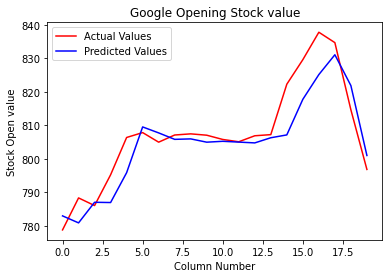

In [77]:
plt.plot(y_test,color="red",label="Actual Values")
plt.plot(y_pred,color="blue",label="Predicted Values")
plt.xlabel("Column Number")
plt.ylabel("Stock Open value")
plt.title("Google Opening Stock value")
plt.legend()
plt.show()